# Mon Projet de machine learning sur le titanic

## 1. Exploration des données

### Objectif :
Comprendre le mieux possible nos données
Developper une stratégie de modelisatin
### Checklist de Base
#### Analyse de forme
variable Target: Survived 
** ligne et colonne:(891, 15)
** type de variable: variable quantitative et varible qualitative
** Analyse des valeur manquantes: la plutpart des colonnes n'ont de valeur manquante considérable sauf pour la colonne age(dont 20% de ses valeurs sont manquante) et pour la colonne deck(dont 77% de ses valeur sont manquantes)
#### Analyse de fond
visualisation de target: 38% on constate il n y avait que 38% de survie dans le titanic
signification des ariables:
• Survived : indique la mort ou la survie du passager pour l’apprentissage. C’est le vecteur
  à prédire pour le test. Le résultat est booléen : 1 pour « survie », 0 pour « mort ».
• Pclass : la classe des chambres du navire, à 3 niveaux : 1 étant la meilleure, 3 la classe
   « éco » et 2 l’intermédiaire. C’est donc une variable catégorielle, mais qui pourrait être
     considérée comme ordonnée.
• Sex : le sexe du passager. C’est une variable catégorielle à 2 modalités : « Male » et               « Female ».
• Age : l’âge du passager, une variable continue avec valeurs manquantes.
• SisbSp (Sibling and Spouse) : le nombre de membres de la famille du passager de type
frère, sœur, demi-frère, demi-sœur, époux, épouse (une variable continue).
• Parch (Parent and Child) : le nombre de membres de la famille du passager du type
père, mère, fils, fille, beau-fils, belle-fille (également une variable continue).
• Ticket : le numéro du ticket, une variable catégorielle.
• Fare : le prix du ticket, une variable continue.
• Embarked : le port d’embarquement du passager, une variable catégorielle à 3 modalités
Relation Target\Variable :il semblerait que le Target survivedest lié à la variable pclass, sex

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.shape

(891, 15)

In [6]:
df.dtypes.value_counts()

object      5
int64       4
float64     2
bool        2
category    1
category    1
dtype: int64

In [7]:
df.isna().sum()/df.shape[0]

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

Ces résultats montrent le pourcentage de valeurs manquantes pour chaque colonne du DataFrame. Voici l'interprétation pour chaque variable :

    "survived", "pclass", "sex", "sibsp", "parch", "fare", "class", "who", "adult_male", "alive" et "alone" : Toutes ces variables ont un pourcentage de 0, ce qui signifie qu'elles ne présentent aucune valeur manquante. C'est une bonne chose, car cela signifie que nous disposons de toutes les données pour ces variables.

    "age" : La variable "age" a un pourcentage de 0.198653, ce qui signifie qu'environ 19.87% des données dans cette colonne sont manquantes. Cela indique que certaines lignes du jeu de données n'ont pas d'âge renseigné pour les passagers correspondants.

    "embarked" et "embark_town" : Ces deux variables ont un pourcentage de 0.002245, ce qui signifie que seulement environ 0.22% des données dans ces colonnes sont manquantes. Cela indique qu'il y a très peu de valeurs manquantes pour ces variables.

    "deck" : La variable "deck" a le pourcentage le plus élevé de valeurs manquantes, avec 0.772166. Cela signifie que près de 77.22% des données dans cette colonne sont manquantes, ce qui est un pourcentage élevé. Cela suggère que cette variable pourrait avoir des problèmes de données manquantes et nécessiterait une attention particulière lors de l'analyse ou de la construction de modèles.

En conclusion, la plupart des variables ne présentent pas de valeurs manquantes ou en ont très peu, ce qui est une bonne nouvelle pour l'analyse et la modélisation. Cependant, la variable "age" a environ 19.87% de valeurs manquantes, et la variable "deck" a un pourcentage très élevé de 77.22% de valeurs manquantes. Ces deux variables pourraient nécessiter un traitement approprié pour gérer les valeurs manquantes avant de les utiliser dans des analyses ou des modèles d'apprentissage 

faissons la visualisation des valeurs manquantes

<AxesSubplot:>

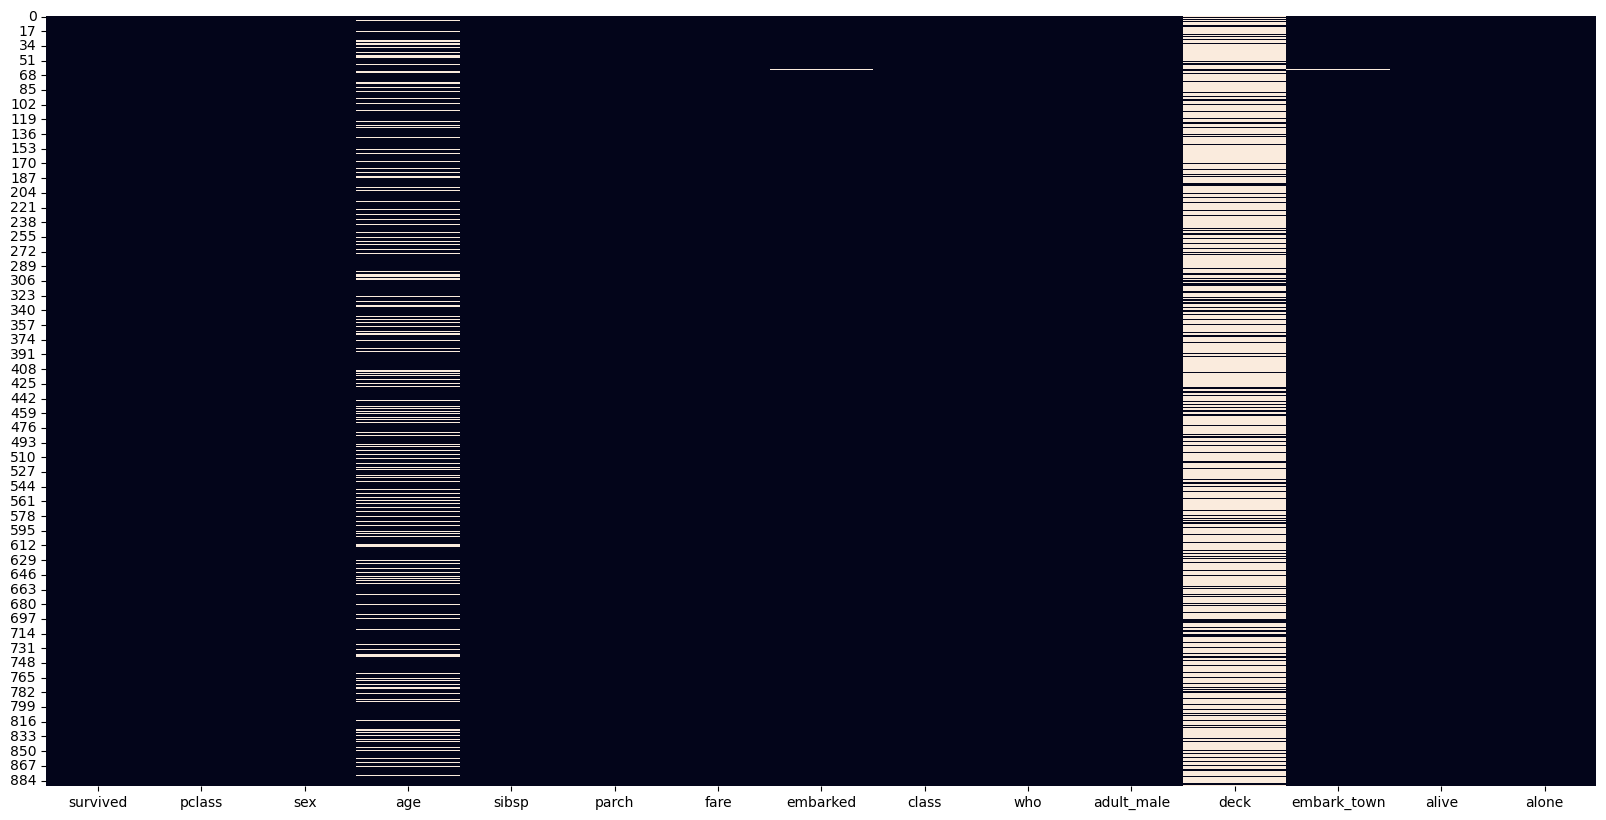

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [9]:
df['survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

#### Interpretation

    0 : La valeur 0 de la variable "survived" apparaît dans environ 61.62% des échantillons du DataFrame. Cela signifie que près de 61.62% des passagers du Titanic représentés dans le jeu de données n'ont pas survécu (sont décédés).

    1 : La valeur 1 de la variable "survived" apparaît dans environ 38.38% des échantillons du DataFrame. Cela signifie que près de 38.38% des passagers du Titanic représentés dans le jeu de données ont survécu.

En résumé, la distribution des valeurs de la variable "survived" montre qu'il y a environ 61.62% de passagers décédés et environ 38.38% de passagers ayant survécu dans le jeu de données. Cette répartition peut être utile pour comprendre l'équilibre des classes dans le problème de prédiction de la survie, notamment lors de la construction de modèles d'apprentissage automatique, car il peut y avoir un déséquilibre des classes à prendre en compte lors de l'évaluation de la performance du modèle.

In [10]:
df_survie=df[df['survived']==1]
df_pas_survie=df[df['survived']==0]

/home/mouhammed/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mouhammed/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


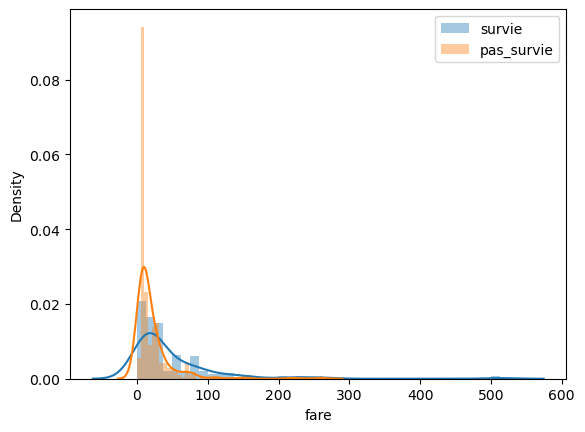

In [11]:
plt.figure()
sns.distplot(df_survie['fare'],label='survie')
sns.distplot(df_pas_survie['fare'],label='pas_survie')
plt.legend()

#### Interpretation

D'après l'analyse de la figure, il n'y a pas de grande différence entre les survivants et les non-survivants du Titanic en fonction de la colonne "fare" (le prix du billet payé par les passagers).

Cette conclusion est basée sur le graphique ou l'analyse visuelle effectuée en traçant la relation entre la variable "fare" et la variable "survived". Si les deux groupes (survivants et non-survivants) avaient des distributions de prix de billet très différentes, on observerait des variations significatives ou des écarts marqués entre les deux courbes représentant les valeurs de "fare" pour les deux groupes.

Cependant, d'après la figure, il n'y a pas de distinction évidente entre les deux groupes en ce qui concerne les valeurs de "fare". Cela suggère que le prix du billet n'a pas été un facteur décisif pour prédire la survie des passagers.

<AxesSubplot:xlabel='age', ylabel='count'>

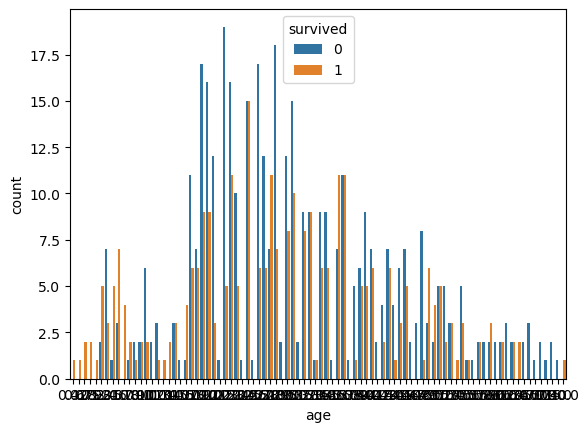

In [12]:
sns.countplot(x='age',hue='survived',data=df)

L'assertion exprimée est correcte. Il est effectivement difficile de formuler une hypothèse simple et directe concernant la relation entre l'âge et la survie des passagers du Titanic. L'analyse de cette relation peut être très complexe en raison de plusieurs facteurs :

    Données manquantes : Comme nous l'avons vu précédemment, la variable "age" peut contenir un pourcentage non négligeable de valeurs manquantes (dans l'exemple donné, environ 19.87% des données sont manquantes). Gérer ces valeurs manquantes peut être délicat et nécessite des techniques d'imputation appropriées.

    Multitude de facteurs : La relation entre l'âge et la survie peut être influencée par de nombreux autres facteurs tels que le sexe, la classe des passagers, la présence de membres de la famille à bord, etc. Il est important de prendre en compte ces variables supplémentaires pour obtenir une analyse plus précise.

    Distribution des âges : L'âge peut être réparti de manière très variée, allant des bébés aux personnes âgées, ce qui peut rendre difficile l'identification d'un modèle simple pour prédire la survie en fonction de l'âge.

    Relations non linéaires : La relation entre l'âge et la survie peut être non linéaire, c'est-à-dire que l'effet de l'âge sur la survie peut varier selon différentes tranches d'âge

In [13]:
df_survie['pclass'].value_counts(normalize=True)

1    0.397661
3    0.347953
2    0.254386
Name: pclass, dtype: float64

In [14]:
df_pas_survie['pclass'].value_counts(normalize=True)

3    0.677596
2    0.176685
1    0.145719
Name: pclass, dtype: float64

<AxesSubplot:xlabel='pclass', ylabel='count'>

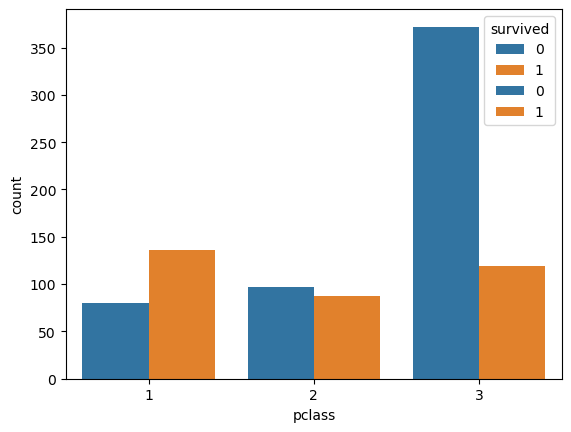

In [17]:
plt.figure()
sns.countplot(x=df_survie['pclass'],hue='survived',data=df)
sns.countplot(x=df_pas_survie['pclass'],hue='survived',data=df)


Ces résultats montrent la répartition des classes des passagers du Titanic pour deux groupes distincts : les survivants (df_survie) et les non-survivants (df_pas_survie).

Premier groupe (df_survie - Survivants) :

    1ère classe (pclass=1) : Environ 39.77% des survivants appartenaient à la première classe.
    3ème classe (pclass=3) : Environ 34.80% des survivants appartenaient à la troisième classe.
    2ème classe (pclass=2) : Environ 25.44% des survivants appartenaient à la deuxième classe.

Deuxième groupe (df_pas_survie - Non-survivants) :

    3ème classe (pclass=3) : Environ 67.76% des non-survivants appartenaient à la troisième classe.
    2ème classe (pclass=2) : Environ 17.67% des non-survivants appartenaient à la deuxième classe.
    1ère classe (pclass=1) : Environ 14.57% des non-survivants appartenaient à la première classe.

Interprétation :

On peut clairement voir une différence dans la répartition des classes entre les survivants et les non-survivants du Titanic. Une plus grande proportion de survivants appartenaient à la première classe (39.77%), tandis qu'une majorité écrasante de non-survivants étaient des passagers de troisième classe (67.76%).

Cela suggère que la classe des passagers (pclass) a joué un rôle significatif dans la probabilité de survie lors du naufrage du Titanic. Les passagers de première classe ont eu une probabilité plus élevée de survie, tandis que ceux de troisième classe ont été les plus touchés par la tragédie.

In [18]:
df_survie['sex'].value_counts(normalize=True)

female    0.681287
male      0.318713
Name: sex, dtype: float64

In [19]:
df_pas_survie['sex'].value_counts(normalize=True)

male      0.852459
female    0.147541
Name: sex, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='count'>

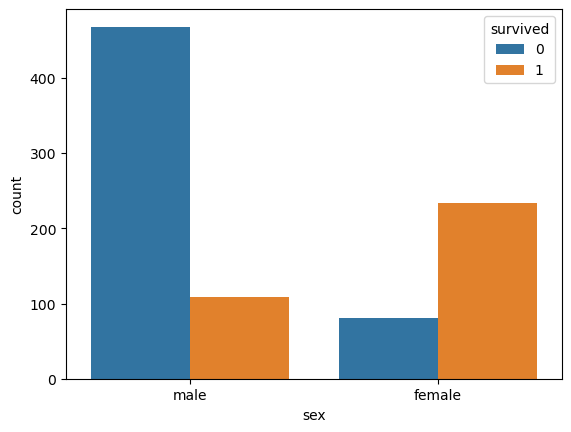

In [20]:
sns.countplot(x=df['sex'],hue='survived',data=df)

Ces résultats montrent la répartition des sexes des passagers du Titanic pour deux groupes distincts : les survivants (df_survie) et les non-survivants (df_pas_survie).

Premier groupe (df_survie - Survivants) :

    Femmes (sex=female) : Environ 68.13% des survivants étaient des femmes.
    Hommes (sex=male) : Environ 31.87% des survivants étaient des hommes.

Deuxième groupe (df_pas_survie - Non-survivants) :

    Hommes (sex=male) : Environ 85.25% des non-survivants étaient des hommes.
    Femmes (sex=female) : Environ 14.75% des non-survivants étaient des femmes.

Interprétation :

Les résultats mettent en évidence une différence significative entre les sexes des survivants et des non-survivants du Titanic.

    La proportion de femmes parmi les survivants (68.13%) est nettement plus élevée que celle parmi les non-survivants (14.75%). Cela indique que les femmes avaient une probabilité de survie beaucoup plus élevée que les hommes lors du naufrage du Titanic.

    D'autre part, la proportion d'hommes parmi les non-survivants (85.25%) est beaucoup plus élevée que celle parmi les survivants (31.87%). Cela suggère que les hommes ont été les plus touchés par la tragédie et avaient une probabilité de survie nettement plus faible que les femmes.

Ces résultats mettent en évidence l'importance du sexe dans la probabilité de survie lors du naufrage du Titanic. Les femmes ont été favorisées dans l'évacuation des bateaux de sauvetage, ce qui explique leur taux de survie beaucoup plus élevé par rapport aux hommes.

Ces observations peuvent être utiles pour mieux comprendre les facteurs qui ont influencé les chances de survie des passagers lors de cette catastrophe maritime historique.

In [21]:
df_survie['sibsp'].value_counts(normalize=True)

0    0.614035
1    0.327485
2    0.038012
3    0.011696
4    0.008772
Name: sibsp, dtype: float64

In [22]:
df_pas_survie['sibsp'].value_counts(normalize=True)

0    0.724954
1    0.176685
4    0.027322
2    0.027322
3    0.021858
8    0.012750
5    0.009107
Name: sibsp, dtype: float64

<AxesSubplot:xlabel='sibsp', ylabel='count'>

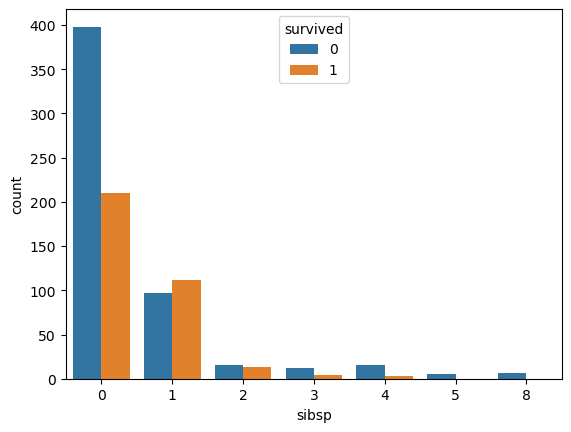

In [23]:
sns.countplot(x=df['sibsp'],hue='survived',data=df)

Ces résultats montrent la répartition du nombre de frères et sœurs (ou conjoint) à bord du Titanic pour deux groupes distincts : les survivants (df_survie) et les non-survivants (df_pas_survie).

Premier groupe (df_survie - Survivants) :

    Aucun frère/soeur ou conjoint (sibsp=0) : Environ 61.40% des survivants n'avaient aucun frère/soeur ou conjoint à bord.
    Un frère/soeur ou conjoint (sibsp=1) : Environ 32.75% des survivants avaient un frère/soeur ou conjoint à bord.
    Deux frères/soeurs ou conjoints (sibsp=2) : Environ 3.80% des survivants avaient deux frères/soeurs ou conjoints à bord.
    Trois frères/soeurs ou conjoints (sibsp=3) : Environ 1.17% des survivants avaient trois frères/soeurs ou conjoints à bord.
    Quatre frères/soeurs ou conjoints (sibsp=4) : Environ 0.88% des survivants avaient quatre frères/soeurs ou conjoints à bord.

Deuxième groupe (df_pas_survie - Non-survivants) :

    Aucun frère/soeur ou conjoint (sibsp=0) : Environ 72.50% des non-survivants n'avaient aucun frère/soeur ou conjoint à bord.
    Un frère/soeur ou conjoint (sibsp=1) : Environ 17.67% des non-survivants avaient un frère/soeur ou conjoint à bord.
    Quatre frères/soeurs ou conjoints (sibsp=4) : Environ 2.73% des non-survivants avaient quatre frères/soeurs ou conjoints à bord.
    Deux frères/soeurs ou conjoints (sibsp=2) : Environ 2.73% des non-survivants avaient deux frères/soeurs ou conjoints à bord.
    Trois frères/soeurs ou conjoints (sibsp=3) : Environ 2.19% des non-survivants avaient trois frères/soeurs ou conjoints à bord.
    Huit frères/soeurs ou conjoints (sibsp=8) : Environ 1.28% des non-survivants avaient huit frères/soeurs ou conjoints à bord.
    Cinq frères/soeurs ou conjoints (sibsp=5) : Environ 0.91% des non-survivants avaient cinq frères/soeurs ou conjoints à bord.

Interprétation :

Les résultats montrent des différences dans la répartition du nombre de frères/soeurs ou conjoints à bord entre les survivants et les non-survivants du Titanic.

    Une plus grande proportion de survivants avait un frère/soeur ou conjoint à bord (32.75%) par rapport aux non-survivants (17.67%).

    Les non-survivants étaient plus susceptibles de voyager seuls, car environ 72.50% d'entre eux n'avaient aucun frère/soeur ou conjoint à bord, contre seulement 61.40% chez les survivants.

Ces observations indiquent que la présence de membres de la famille à bord peut avoir eu une certaine influence sur la probabilité de survie des passagers lors du naufrage du Titanic. Cependant, pour une analyse plus approfondie, il serait intéressant d'étudier davantage les interactions entre cette variable et d'autres facteurs pour mieux comprendre son impact sur la survie.

In [24]:
df['deck'].isna().sum()

688

<AxesSubplot:xlabel='embarked', ylabel='count'>

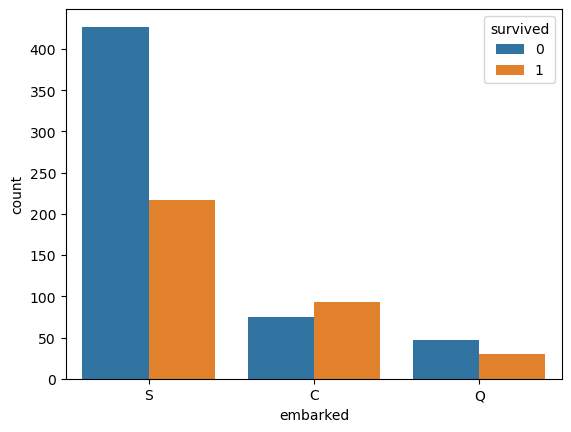

In [25]:
sns.countplot(x=df['embarked'],hue='survived',data=df)

In [26]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Relation Variables \Variables

    On constate une grande similarité entre les variables :

    La variable "embarked" est équivalente à la variable "embarked_town" car on a remplacé "Southampton", "Cherbourg",... du variable "embarked_town" par leurs premières lettres, à savoir S, C,... dans la variable "embarked".

    La variable "alive" est équivalente à la variable "survived" car la variable "survived" est l'encodage de la variable "alive".

    La variable "who" est équivalente à la variable "sex" car les deux variables sont les mêmes. Les hommes ont le sexe "male" et les femmes ont le sexe "female".

    La variable "pclass" est équivalente à la variable "classe" car la variable "pclass" est l'encodage de la variable "classe".

    La variable "age" est liée à la variable "adult_male".

    La variable "alone" est équivalente à la variable "sibsp" car la variable "sibsp" est l'encodage de la variable "alone".

### Strategie

Nous allons continuer à travailler avec les variables "age", "pclass" et "sex" car elles semblent être liées à la survie des passagers du Titanic, d'après les hypothèses émises lors de l'analyse entre la variable cible et ces variables.

Il semble inutile de travailler avec la variable "deck", puisque 77% de ses valeurs sont manquantes.

Nous allons choisir une seule variable parmi les variables équivalentes, ce qui signifie que nous n'allons pas continuer avec les variables "alive", "adult_male", "who" et "classe". Nous allons plutôt continuer à travailler avec les variables "age", "sex", "pclass" et "survived"

In [29]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## 2.Prè-Traitement Et le Traitement de nos données

### Objectif

Avant de procéder à l'entraînement de notre modèle, nous devons suivre les étapes suivantes :

    Séparer nos données en ensembles d'entraînement et de test : Nous allons diviser notre jeu de données en deux parties : un ensemble d'entraînement qui sera utilisé pour entraîner le modèle et un ensemble de test qui sera utilisé pour évaluer la performance du modèle sur des données qu'il n'a jamais vues auparavant.

    Encodage des données : Pour que notre modèle puisse travailler avec les données, nous devons encoder les variables catégorielles en utilisant des techniques telles que l'encodage one-hot (pour les variables nominales) ou l'encodage ordinal (pour les variables ordinales).

    Nettoyage des valeurs manquantes : Nous devons gérer les valeurs manquantes dans notre jeu de données. Cela peut être fait en utilisant des méthodes telles que l'imputation (remplacer les valeurs manquantes par des valeurs estimées) ou en supprimant les lignes ou colonnes contenant des valeurs manquantes si cela est approprié.

Premier modèle : Évaluation - Diagnostic :

Après avoir préparé nos données, nous pouvons construire un premier modèle d'apprentissage automatique, tel qu'une régression logistique, une forêt aléatoire ou un réseau de neurones. Ensuite, nous évaluerons la performance de ce modèle en utilisant des métriques appropriées, telles que l'exactitude (accuracy), la précision (precision), le rappel (recall), le F1-score, etc. Cette évaluation nous permettra de diagnostiquer la performance de notre modèle et d'identifier les éventuelles faiblesses.

Améliorer la performance de notre modèle :

Pour améliorer la performance de notre modèle, nous pouvons mettre en œuvre plusieurs stratégies :

    Optimisation des hyperparamètres : Nous pouvons utiliser des techniques d'optimisation pour trouver les meilleurs hyperparamètres pour notre modèle, tels que la recherche par grille (grid search) ou l'optimisation bayésienne.

    Sélection de caractéristiques (feature selection) : Si nous avons un grand nombre de caractéristiques, nous pouvons utiliser des méthodes de sélection de caractéristiques pour identifier les variables les plus importantes et supprimer les caractéristiques moins informatives, ce qui peut améliorer les performances du modèle.

    Utilisation de modèles plus avancés : Nous pouvons essayer d'autres modèles plus complexes ou sophistiqués pour voir s'ils améliorent les performances du modèle. Par exemple, nous pourrions essayer des méthodes d'apprentissage ensembliste comme le gradient boosting ou les réseaux de neurones profonds.

    Validation croisée : Pour obtenir des estimations plus fiables des performances du modèle, nous pouvons utiliser la validation croisée, qui permet de diviser les données en plusieurs ensembles d'entraînement et de test pour évaluer le modèle de manière plus robuste.

    Traitement des données aberrantes : Si notre jeu de données contient des valeurs aberrantes (outliers), nous pouvons décider de les traiter d'une manière appropriée, par exemple en les supprimant ou en les remplaçant par des valeurs plus appropriées.

    Gestion du déséquilibre de classe : Si notre variable cible présente un déséquilibre de classe, c'est-à-dire que les catégories sont représentées de manière inégale, nous pouvons utiliser des techniques de sur-échantillonnage ou de sous-échantillonnage pour équilibrer les classes et améliorer les performances du modèle

In [31]:
# le tableau obtenue apres l'exploration de nos données est en eliminant les variables qui n'ont pas
# un grand impct sur notre Target (survived)
df.drop(['sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],axis=1,inplace=True)

### Nettoyage des valeurs maquantes

In [32]:
df.dropna(axis=0,inplace=True)
df.shape

(714, 4)

### l'encodage de nos données

In [33]:
df['sex'].replace(['female','male'],[1,0],inplace=True)

### Séparation de nos données

In [34]:
from sklearn.model_selection import train_test_split
y=df['survived']
x=df.drop('survived',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Modelisation

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
model.predict(x_test)

/home/mouhammed/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [36]:
model.score(x_test,y_test)

/home/mouhammed/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7832167832167832

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve


In [38]:
mod=make_pipeline(PolynomialFeatures(),StandardScaler())
RandomFor=make_pipeline(mod,RandomForestClassifier())
KNN=make_pipeline(mod,KNeighborsClassifier())
svc=make_pipeline(mod,SVC())
DecisionTree=make_pipeline(mod,DecisionTreeClassifier())
SGD=make_pipeline(mod,SGDClassifier())


In [40]:
list_modele={'randomForest':RandomFor,'KNN':KNN,'svc':svc,'DecisionTree':DecisionTree,'SGD':SGD}
for name, modele in list_modele.items():
    modele.fit(x_train,y_train)
    print(name)
    print(modele.score(x_test,y_test))

randomForest
0.8321678321678322
KNN
0.8251748251748252
svc
0.7972027972027972
DecisionTree
0.8181818181818182
SGD
0.7692307692307693


/home/mouhammed/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


    RandomForest : Le modèle Random Forest a atteint une précision (score) d'environ 83.22% sur l'ensemble de test.

    KNN : Le modèle KNN (K-Nearest Neighbors) a obtenu une précision d'environ 82.52% sur l'ensemble de test.

    SVC : Le modèle SVC (Support Vector Classifier) a atteint une précision d'environ 79.72% sur l'ensemble de test.

    DecisionTree : Le modèle Decision Tree a obtenu une précision d'environ 81.82% sur l'ensemble de test.

    SGD : Le modèle SGD (Stochastic Gradient Descent) a atteint une précision d'environ 76.92% sur l'ensemble de test.

En général, le modèle Random Forest a obtenu la meilleure performance parmi les modèles testés, avec une précision d'environ 83.22%. Cependant, il est important de noter que ces résultats peuvent varier en fonction des données utilisées et des hyperparamètres choisis pour chaque modèle. Pour sélectionner le meilleur modèle, il est essentiel de comparer ces performances et de les considérer conjointement avec d'autres métriques d'évaluation telles que la précision, le rappel, le F1-score, etc., en fonction des objectifs spécifiques du problème d'apprentissage automatique.